In [1]:
import weaviate
from weaviate.classes.config import Configure, Property
from weaviate.collections.classes.config_vectorizers import Multi2VecField
from weaviate.collections.classes.config import DataType
from utils import image_to_base64
import os
from weaviate.classes.query import MetadataQuery
import tqdm

In [2]:
client = weaviate.connect_to_local()

In [4]:
client.collections.delete_all()

In [4]:
client.collections.create(
    "Images",
    properties=[
        Property(name="image", data_type=DataType.BLOB),
    ],
    vectorizer_config=[
        Configure.NamedVectors.multi2vec_clip(
            name='image_vector',
            image_fields=[
                Multi2VecField(name="image")
            ]
        )
    ]
)

In [5]:
client.collections.list_all()

{}

In [25]:
image_to_base64('./test_images/download.jpg')

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxAPDxANDxIPDw0ODQ0NDQ0NDw8NDQ4NFREWFhURFxUYHSggGBolGxUVITEhJSkrLjAuFx8zODMtNygtLisBCgoKDg0OFxAQFS0dHR0rLSsrLSstLS4rLS0tLS0tLS0rLSstLSsrKystLSstKystLS0rKysrKystLS0rMCsrK//AABEIALkBEAMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAECBQYAB//EADwQAAICAQIDBQUFBwMFAQAAAAECAAMRBBIFITEGE0FRYSJxgZGhFCMyQrEHM1JywdHwgpLhF0NiosIV/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/xAAgEQEBAAICAgIDAAAAAAAAAAAAAQIRITEDEkFREyJh/9oADAMBAAIRAxEAPwDlWWCZY0wgWE6OYO2XCyQIRVgUCSwSECy4WAIJJ2QwSWCQABJOyH2SdkBfZPbIxsk7IC+yRsjOye2QFtk93cZ2QOr1CVDLZyeijmxhVO7kd3Mu7i1pIwFRSclipJC/5+kvoeMmxym0HphlGMjpnnJtdH+7kGuNlJXZKhU1yprjeyQUhCfdSDVGykjZATNcqa44UlSkBM1yprjhSUKQFDXIKRopKlIUqa5BSMlZUrAWNcgVxgrPBYGsywLLGnEERCBKsIqyQsIqwIVZcLLhZcLCKBZYLCBZYLKBbZO2GCT2yAHbPbYfZJ2QAbZ7ZGNknZAW245noOZ90xtfq+8B2B0srcgAclZOfVs8ySCMEYHrjM37U9lvPa2PfiLX8JUMuAT3jVFFHItu57R5nBWZreIGj4BbdUhZhWrVqm0gsQAx59cc+fzmrw7sFWhVzbYF3BsIAMkDAPPxnRcU0v2SulLSFYAknPLnjx+cY02sUoMOpA8jkATz3LLb244YanDjddwuzSW9w5LoQXpuOBvTdzBHgwyM/Dzgdk67tDq

In [ ]:
from pathlib import Path
all_files = []
for dirpath, dirnames, filenames in os.walk(r"C:\Users\Misha\Downloads\train_dataset_train_data_rkn\train_data_rkn\dataset"):
    # print(dirpath, dirnames, filenames)
    for filename in filenames:
        if os.path.isfile(Path(r"D:/", dirpath ,filename)):
            if not filename.startswith('.') and filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                all_files.append(Path(dirpath ,filename))

In [21]:
all_files[:10]

[WindowsPath('001e9bee1924c738.jpg'),
 WindowsPath('0037a8ffc9230080.jpg'),
 WindowsPath('0073104477e43ea7.jpg'),
 WindowsPath('007576a0d87ce5d2.jpg'),
 WindowsPath('0089646f97a57599.jpg'),
 WindowsPath('00e50db1ace07231.jpg'),
 WindowsPath('00eaaf3ecceb80a8.jpg'),
 WindowsPath('011598fe445e2077.jpg'),
 WindowsPath('0132311154629f26.jpg'),
 WindowsPath('01cc22eb34653a82.jpg')]

In [13]:
for img in all_files[:10]:
    print(str(img).split('\\')[-2])

Accordion
Accordion
Accordion
Accordion
Accordion
Accordion
Accordion
Accordion
Accordion
Accordion


In [ ]:

# UPLOAD IMAGES
collection = client.collections.get("Images")
with collection.batch.dynamic() as batch:
    for img in os.listdir('../test_images'):

        weaviate_obj = {
            "image": image_to_base64('../test_images/'+img),
        }
        uuid = batch.add_object(properties=weaviate_obj)
        with open('../test_images/'+img, 'rb') as f:
            file = File(f, name=img)
            Test.objects.create(name=img, weaviate_id=uuid, file=file, cluster=)
print(f'Populated database with {len(os.listdir("../test_images"))} images in {time.time() - start} seconds')
client.close()

In [ ]:
# BATCH UPLOAD IMAGES
collection = client.collections.get("Images")
i = 0
with collection.batch.dynamic() as batch:
    for img in all_files:
        i+=1
        weaviate_obj = {
            "image": image_to_base64(img),
        }
        ids = batch.add_object(properties=weaviate_obj)
        print(i)

In [8]:
collection = client.collections.get("Images")

uuid = collection.data.insert(
    properties={
        "image": image_to_base64('./test_images/Drake.png')
    }
)
uuid

UUID('8b306645-d0e6-4565-9f84-b9166403f265')

In [12]:
result = collection.query.near_image(
        near_image=image_to_base64('te4st.png'),
        return_properties=["image"],
        return_metadata=MetadataQuery(distance=True),
        include_vector=True,
        limit=4
    )

In [86]:
result.objects[0].vector

{'image_vector': [-0.012261515483260155,
  0.01964634843170643,
  -0.052181072533130646,
  0.016962027177214622,
  0.013693505898118019,
  0.05263836309313774,
  0.001091714366339147,
  0.03519754111766815,
  -0.1736598163843155,
  -0.045632652938365936,
  -0.022144217044115067,
  0.05328156054019928,
  0.011521933600306511,
  0.034092068672180176,
  0.012873751111328602,
  -0.035242412239313126,
  0.025725001469254494,
  0.006639694795012474,
  0.016777081415057182,
  -0.038437556475400925,
  0.039496734738349915,
  -0.025721631944179535,
  0.017142580822110176,
  -0.0013017896562814713,
  0.03151412308216095,
  0.008766929619014263,
  0.027982957661151886,
  0.000407207669923082,
  -0.02311803214251995,
  0.004760372918099165,
  0.00672486238181591,
  0.03800155967473984,
  -0.0008334725280292332,
  -0.029035070911049843,
  -0.016926202923059464,
  0.03484291210770607,
  -0.03571689501404762,
  -0.011718262918293476,
  -0.020311543717980385,
  -0.007849632762372494,
  0.0028386379126

In [13]:
for i in tqdm.tqdm(range(1000)):
    res = collection.query.near_vector(
            near_vector=result.objects[0].vector['image_vector'],
            return_properties=["image"],
            return_metadata=MetadataQuery(distance=True),
            limit=4
        )
    

 16%|█▌        | 161/1000 [00:29<02:34,  5.43it/s]


KeyboardInterrupt: 

In [14]:
# IMAGE SEARCH
import pprint

import time

a = time.time()
for i in tqdm.tqdm(range(1000)):
    result = collection.query.near_image(
        near_image=image_to_base64('te4st.png'),
        return_properties=["image"],
        return_metadata=MetadataQuery(distance=True),
        limit=4
    )
print(f'took: {time.time() - a}')

# pprint.pprint(result.objects[0])

  8%|▊         | 85/1000 [00:23<04:08,  3.69it/s]


KeyboardInterrupt: 

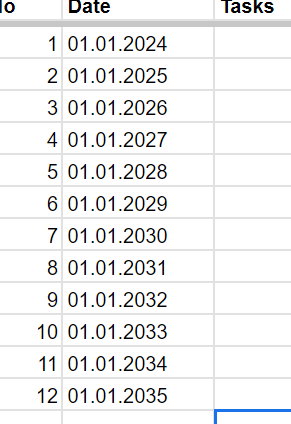

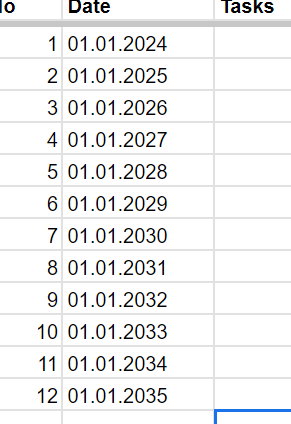

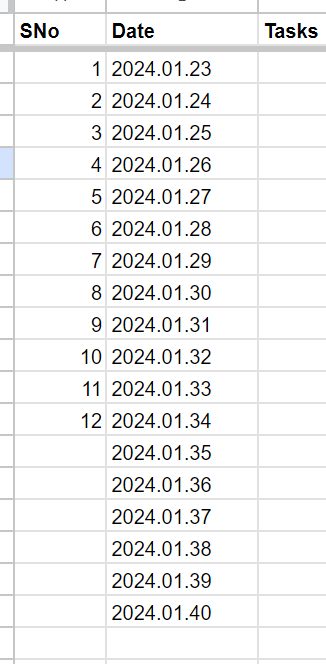

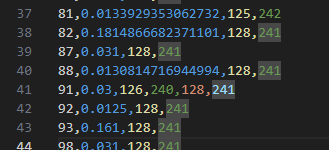

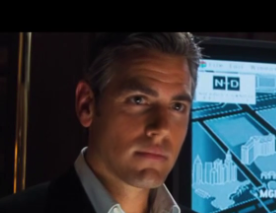

In [98]:
import base64
from IPython.display import display, Image


# Отображение изображения
image_data = base64.b64decode(result.objects[0].properties.get('image'))
display(Image(data=image_data))
for img in result.objects:
    image_data = base64.b64decode(img.properties.get('image'))
    display(Image(data=image_data))

In [83]:
client.close()

In [33]:
import boto3

s3_client = boto3.client(
    's3',
    endpoint_url='http://localhost:9000',
    aws_access_key_id='NPmsPabsLqlQHGXYrab8',
    aws_secret_access_key='1FTehjF1a9QSTt1aTdC5lrdjw8ixIuiMki7cheip'
)

In [34]:
response = s3_client.list_buckets()
print(response)

{'ResponseMetadata': {'RequestId': '180618D8902B23BD', 'HostId': 'dd9025bab4ad464b049177c95eb6ebf374d3b3fd1af9251148b658df7ac2e3e8', 'HTTPStatusCode': 200, 'HTTPHeaders': {'accept-ranges': 'bytes', 'content-length': '364', 'content-type': 'application/xml', 'server': 'MinIO', 'strict-transport-security': 'max-age=31536000; includeSubDomains', 'vary': 'Origin, Accept-Encoding', 'x-amz-id-2': 'dd9025bab4ad464b049177c95eb6ebf374d3b3fd1af9251148b658df7ac2e3e8', 'x-amz-request-id': '180618D8902B23BD', 'x-content-type-options': 'nosniff', 'x-ratelimit-limit': '18465', 'x-ratelimit-remaining': '18465', 'x-xss-protection': '1; mode=block', 'date': 'Fri, 08 Nov 2024 20:40:25 GMT'}, 'RetryAttempts': 0}, 'Buckets': [{'Name': 'images', 'CreationDate': datetime.datetime(2024, 11, 8, 17, 53, 39, 190000, tzinfo=tzlocal())}], 'Owner': {'DisplayName': 'minio', 'ID': '02d6176db174dc93cb1b899f7c6078f08654445fe8cf1b6ce98d8855f66bdbf4'}}
